Тут будут идеи, что сделать с датасетом, как его обработать, что показать
1) Можно построить модель, которая будет прогнозировать цену устройства по его комплектующим(память, цпу, гпу, операционная система, разрешение)
2) Можно построить графиков по поводу соотношения, цен и прочего
3) Выделить разрешение, посмотреть распределение по разрешению, построить гипотезу, что в более дорогих компьютерах более высокое разрешение экрана
4) Какой продукт более востребован у потребителей? (привести конфигурации для разных ценовых групп, типов ноутбуков)
6) нужны еще идеи...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
data_1 = pd.read_csv('laptop_price - dataset.csv')
display(data_1)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


In [3]:
df = data_1.drop(columns='CPU_Frequency (GHz)') #удаляем не интересные данные
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [4]:
print(df.isna().any())
print(df.info())
print(df.describe())

Company             False
Product             False
TypeName            False
Inches              False
ScreenResolution    False
CPU_Company         False
CPU_Type            False
RAM (GB)            False
Memory              False
GPU_Company         False
GPU_Type            False
OpSys               False
Weight (kg)         False
Price (Euro)        False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   CPU_Company       1275 non-null   object 
 6   CPU_Type          1275 non-null   object 
 7   RAM (GB)          1275 non-null   int64  
 8   Memory            1275 non-null   object 


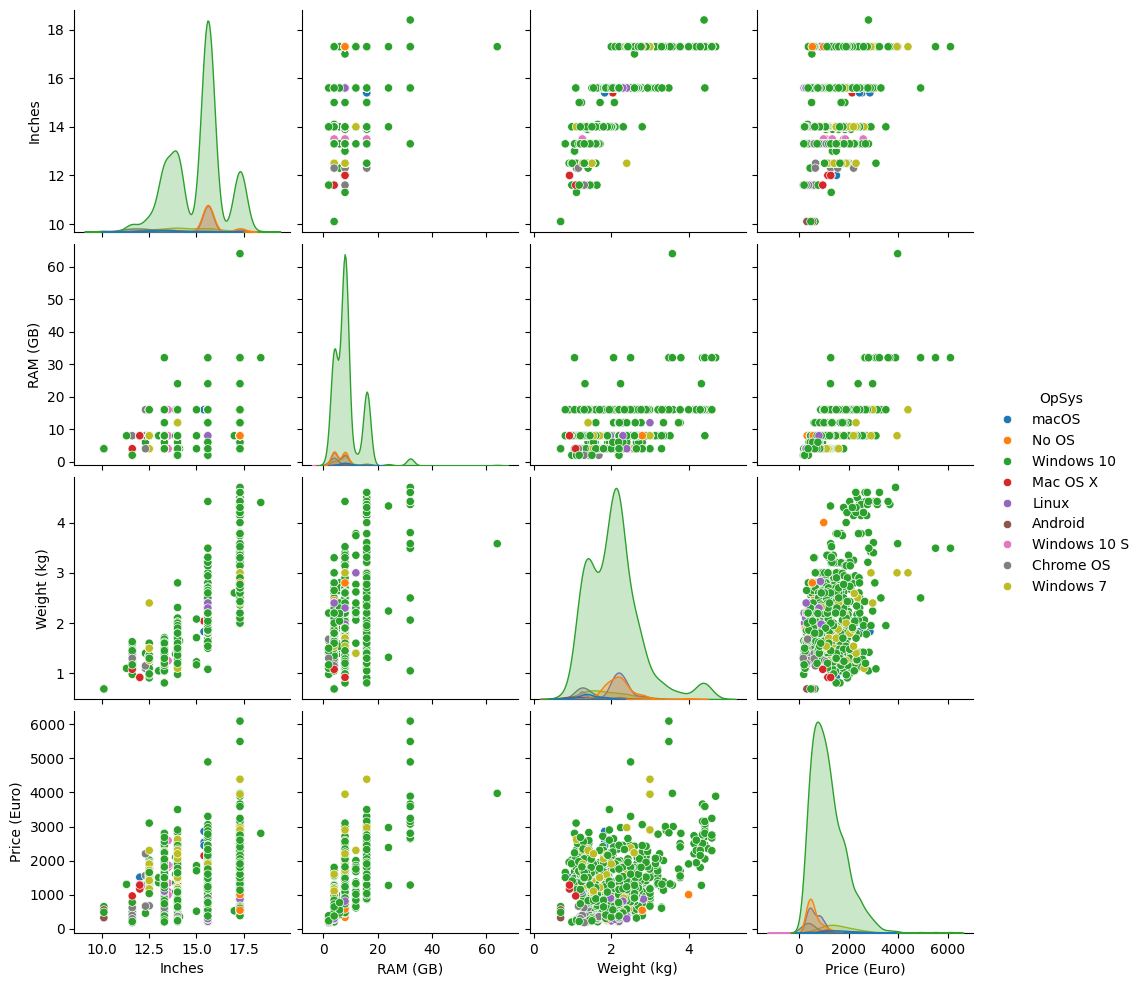

In [5]:
sns.pairplot(df, hue = 'OpSys')

In [6]:
OpSys_names = np.array(df.OpSys.value_counts().index)

In [7]:
OpSys_names

array(['Windows 10', 'No OS', 'Linux', 'Windows 7', 'Chrome OS', 'macOS',
       'Mac OS X', 'Windows 10 S', 'Android'], dtype=object)

In [8]:
list_windows = [x.lower().startswith('windows') for x in OpSys_names]
print(OpSys_names[list_windows])
df['OpSys'] = df['OpSys'].str.lower().replace(['macos', 'mac os x'], 'mac os')
df['OpSys'] = df['OpSys'].replace((OpSys_names[list_windows]), 'windows')
df.OpSys.value_counts().index

['Windows 10' 'Windows 7' 'Windows 10 S']


Index(['windows 10', 'no os', 'linux', 'windows 7', 'chrome os', 'mac os',
       'windows 10 s', 'android'],
      dtype='object', name='OpSys')

In [9]:
df['memory_gb'] = df['Memory'].astype(str).str.extract(r'(\d+)')
df.memory_gb.value_counts()

memory_gb
256    508
1      240
128    175
512    136
500    124
32      43
2       16
64      15
16      10
180      5
240      1
8        1
508      1
Name: count, dtype: int64

In [10]:
df[df['memory_gb'] == '180']

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),memory_gb
477,Lenovo,Thinkpad T470,Notebook,14.0,Full HD 1920x1080,Intel,Core i5 7200U,8,180GB SSD,Intel,HD Graphics 620,windows 10,1.70,1364.0,180
495,Lenovo,Thinkpad X260,Ultrabook,12.5,IPS Panel 1366x768,Intel,Core i5 6200U,8,180GB SSD,Intel,HD Graphics 520,windows 10,1.30,1099.0,180
753,Lenovo,Thinkpad T460,Ultrabook,14.0,Full HD 1920x1080,Intel,Core i5 6200U,4,180GB SSD,Intel,HD Graphics 520,windows 10,1.70,1096.0,180
873,Lenovo,Thinkpad 13,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel,Core i3 7100U,4,180GB SSD,Intel,HD Graphics 620,windows 10,1.44,735.0,180
1087,Lenovo,ThinkPad T460,Notebook,14.0,Full HD 1920x1080,Intel,Core i5 6200U,8,180GB SSD,Intel,HD Graphics 520,windows 7,1.70,1199.0,180


In [11]:
#доделать надо чтобы менялись 1т на 1024гб и аналогично с двойкой
df.memory_gb.value_counts()

memory_gb
256    508
1      240
128    175
512    136
500    124
32      43
2       16
64      15
16      10
180      5
240      1
8        1
508      1
Name: count, dtype: int64